In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
ms=pd.read_csv("Churn_Modelling.csv")

# 3. Perform Below Visualizations.


# Univariate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


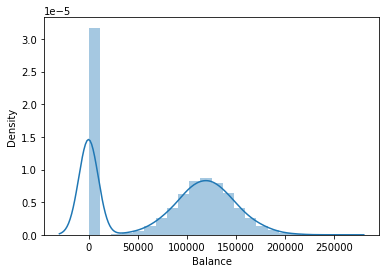

In [ ]:
sns.distplot(ms['Balance'])

# Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


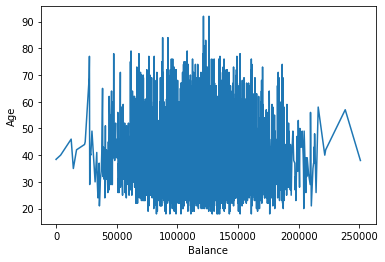

In [ ]:
sns.lineplot(ms['Balance'],ms['Age'])

# Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


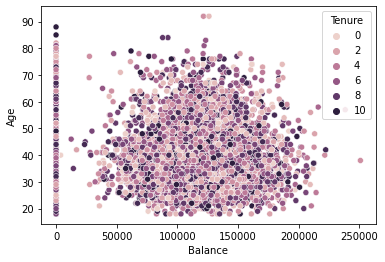

In [ ]:
sns.scatterplot(ms['Balance'],ms['Age'],ms['Tenure'])

# 4.Perform descriptive statistics on the dataset.

In [ ]:
ms.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
ms.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

# 5. Handle the Missing values.

In [ ]:
ms.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
ms.isnull().sum()

NameError: ignored

# 6. Find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


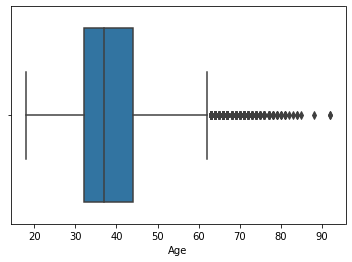

In [ ]:
sns.boxplot(ms['Age'])

In [ ]:
q=ms.quantile([0.75,0.50])
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.50,5000.50,15690738.00,652.0,37.0,5.0,97198.54,1.0,1.0,1.0,100193.9150,0.0


In [ ]:
iqr=q.iloc[0] - q.iloc[1]
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
z=q.iloc[0]+(1.5*iqr)
z

RowNumber          1.124988e+04
CustomerId         1.584698e+07
CreditScore        8.170000e+02
Age                5.450000e+01
Tenure             1.000000e+01
Balance            1.733128e+05
NumOfProducts      3.500000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    2.231797e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)
l

RowNumber          1.250875e+03
CustomerId         1.559699e+07
CreditScore        5.530000e+02
Age                2.650000e+01
Tenure             2.000000e+00
Balance            5.152999e+04
NumOfProducts     -5.000000e-01
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    2.640242e+04
Exited             0.000000e+00
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


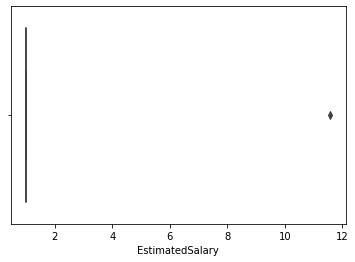

In [ ]:
ms['EstimatedSalary'] = np.where(ms['EstimatedSalary']>21,1,ms['EstimatedSalary'])
sns.boxplot(ms['EstimatedSalary'])

# 7. Check for Categorical columns and perform encoding.

In [24]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
One = OneHotEncoder()
ms['Gender'] = le.fit_transform(ms['Gender'])
ms.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


# 8. Split the data into dependent and independent variables.

In [22]:
x = ms.iloc[:,6:10]
x

,Age,Tenure,Balance,NumOfProducts
0,42,2,0.00,1
1,41,1,83807.86,1
2,42,8,159660.80,3
3,39,1,0.00,2
4,43,2,125510.82,1
...,...,...,...,...
9995,39,5,0.00,2
9996,35,10,57369.61,1
9997,36,7,0.00,1
9998,42,3,75075.31,2


In [23]:
y = ms['CreditScore']
y

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

# 9. Scale the independent variables

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
t = StandardScaler()
scale = t.fit_transform(x)
scale

array([[ 0.29351742, -1.04175968, -1.22584767, -0.91158349],
       [ 0.19816383, -1.38753759,  0.11735002, -0.91158349],
       [ 0.29351742,  1.03290776,  1.33305335,  2.52705662],
       ...,
       [-0.27860412,  0.68712986, -1.22584767, -0.91158349],
       [ 0.29351742, -0.69598177, -0.02260751,  0.80773656],
       [-1.04143285, -0.35020386,  0.85996499, -0.91158349]])

# 10. Split the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scale,y,test_size=0.3,random_state=0)
x_train

array([[-0.56466489, -1.04175968,  1.11721307,  0.80773656],
       [ 0.00745665,  0.68712986, -1.22584767,  0.80773656],
       [ 3.53553951, -0.00442596,  1.35419118, -0.91158349],
       ...,
       [-0.37395771, -0.00442596,  1.35890908,  0.80773656],
       [-0.08789694,  1.37868567, -1.22584767,  0.80773656],
       [ 0.86563897, -1.38753759,  0.50630343, -0.91158349]])

In [35]:
x_train.shape

(7000, 4)

In [36]:
x_test

array([[-0.37395771,  1.03290776,  0.87532296, -0.91158349],
       [ 0.10281024, -1.04175968,  0.42442221, -0.91158349],
       [ 0.29351742,  1.03290776,  0.30292727, -0.91158349],
       ...,
       [ 0.10281024, -1.04175968,  1.46672809,  0.80773656],
       [ 2.86806437,  1.72446358,  1.25761599, -0.91158349],
       [ 0.96099256, -0.35020386,  0.19777742, -0.91158349]])

In [37]:
x_test.shape

(3000, 4)

In [38]:
y_train

7681    641
9031    541
3691    590
202     516
5625    508
       ... 
9225    594
4859    794
3264    738
9845    590
2732    623
Name: CreditScore, Length: 7000, dtype: int64

In [41]:
y_test

9394    597
898     523
2398    706
5906    788
2343    706
       ... 
4004    530
7375    639
9307    685
8394    692
5233    731
Name: CreditScore, Length: 3000, dtype: int64

In [40]:
y_test.shape

(3000,)